# HR Analytics Project

#### HR Analytics Project- Understanding the Attrition in HR

In [230]:
# Importing main required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight') # Good looking plots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets

pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns
#import  as py
#import plotly.express as px



# Not to display warnings.

import warnings
warnings.filterwarnings('ignore')

In [231]:
# Read the given data set
data=pd.read_csv('/Users/rakeshchandramaity/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [232]:
# Creating similar data safe as a backup
data=df

In [233]:
# Head Checking
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41         1      Travel_Rarely       1102                   Sales   
1   49         0  Travel_Frequently        279  Research & Development   
2   37         1      Travel_Rarely       1373  Research & Development   
3   33         0  Travel_Frequently       1392  Research & Development   
4   27         0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

  JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0       1                4             2           5993        19479   
1       2                2             1           5130        24907   
2       3                3             2           2090         2396   
3       2                3             1           2909        23159   
4       3                2             1           3468        16632   

   NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Y        1                 11                  3   
1                   1      Y        0                 23                  4   
2                   6      Y        1                 15                  3   
3                   1      Y        1                 11                  3   
4                   9      Y        0                 12                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

In [234]:
# Tail Checking
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36         0  Travel_Frequently        884  Research & Development   
1466   39         0      Travel_Rarely        613  Research & Development   
1467   27         0      Travel_Rarely        155  Research & Development   
1468   49         0  Travel_Frequently       1023                   Sales   
1469   34         0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
1465            2061                        3   Male          41   
1466            2062                        4   Male          42   
1467            2064                        2   Male          87   
1468            2065                        4   Male          63   
1469            2068                        2   Male          82   

      JobInvolvement  JobLevel JobRole  JobSatisfaction MaritalStatus  \
1465               4         2       3                4             1   
1466               2         3       5                1             1   
1467               4         2       4                2             1   
1468               2         2       1                2             1   
1469               4         2       3                3             1   

      MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  \
1465           2571        12290                   4      Y        0   
1466           9991        21457                   4      Y        0   
1467           6142         5174                   1      Y        1   
1468           5390        13243                   2      Y        0   
1469           4404        10228                   2      Y        0   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1465                 17                  3                         3   
1466                 15                  3                         1   
1467                 20                  4                         2   
1468                 14                  3                         4   
1469                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [236]:
# checking the columns of the data

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [237]:
# Checking the null value if any in the given data set
df.isnull().sum()  

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [238]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [239]:
# Understanding the Attrition Severity
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [240]:
# Attrition Rate
ar=(237/1233)*100
print("Attrition Rate percentage(%) =",ar)

Attrition Rate percentage(%) = 19.22141119221411


##### Observations : Attrition Rate is Very High.

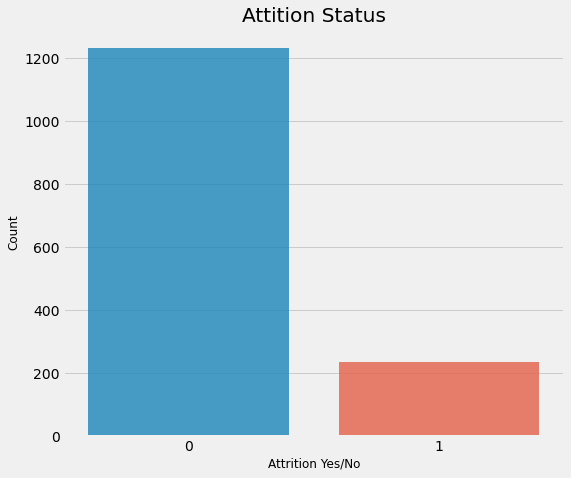

In [241]:
count = df['Attrition'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Attrition Yes/No', fontsize=12)
plt.title('Attition Status')
plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

##### Now we have check Non Numerical Data Types Columns.

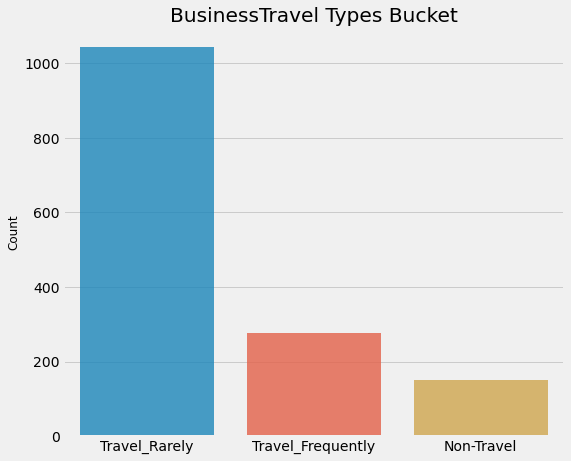

In [242]:
count = df['BusinessTravel'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Count', fontsize=12)
#plt.xlabel('BusinessTravel Types', fontsize=12)
plt.title('BusinessTravel Types Bucket')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

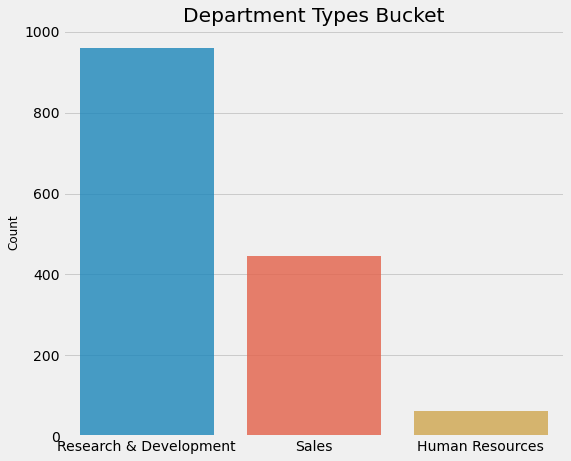

In [243]:
count = df['Department'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Count', fontsize=12)
#plt.xlabel('BusinessTravel Types', fontsize=12)
plt.title('Department Types Bucket')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

In [244]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

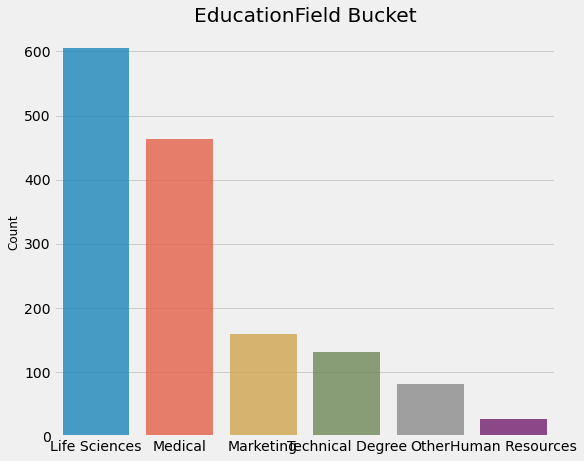

In [245]:
count = df['EducationField'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Count', fontsize=12)
#plt.xlabel('BusinessTravel Types', fontsize=12)
plt.title('EducationField Bucket')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

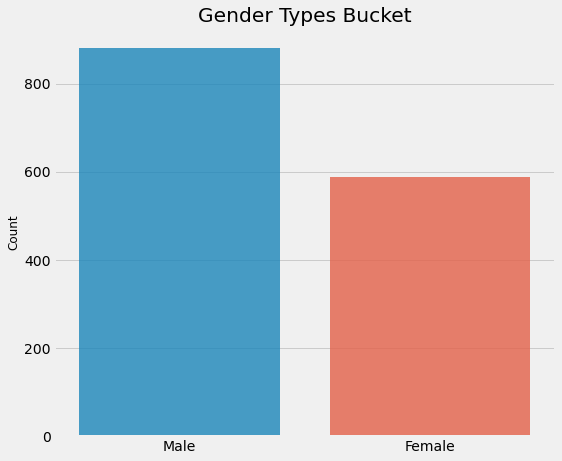

In [246]:
count = df['Gender'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Count', fontsize=12)
#plt.xlabel('BusinessTravel Types', fontsize=12)
plt.title('Gender Types Bucket')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

In [247]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [248]:
df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [249]:
df['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [250]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [251]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [252]:
df['JobRole'].value_counts()

1    326
2    292
3    259
4    145
5    131
6    102
7     83
8     80
9     52
Name: JobRole, dtype: int64

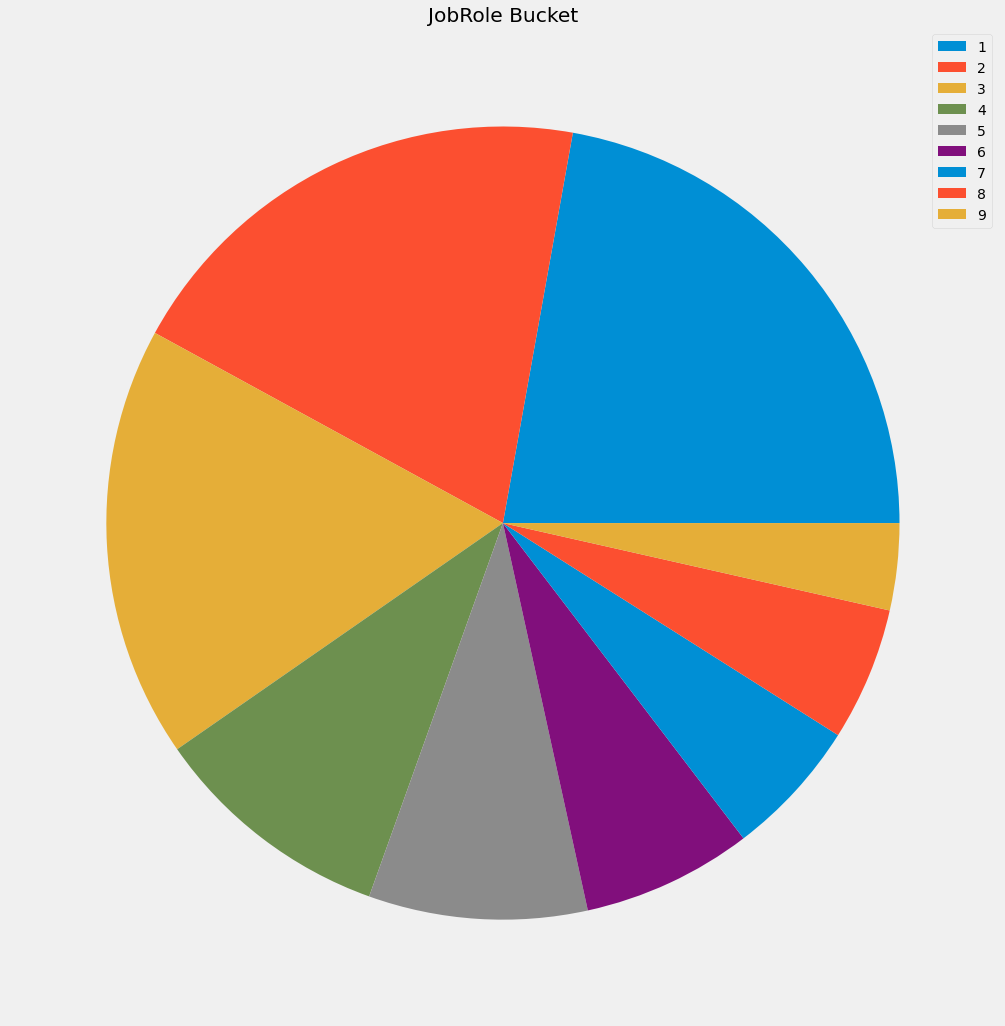

In [253]:
count = df['JobRole'].value_counts()
plt.figure(figsize=(18,17))
plt.pie(count)
plt.legend(count.index)
plt.title('JobRole Bucket')
plt.show()

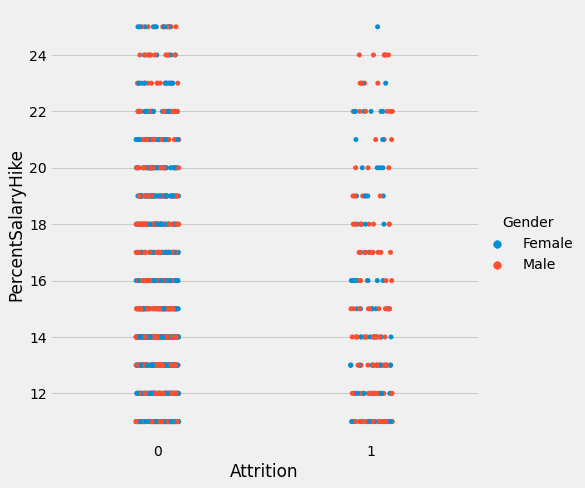

In [254]:
sns.catplot(x="Attrition", y="PercentSalaryHike", data=data,hue='Gender',height=7)
plt.show()

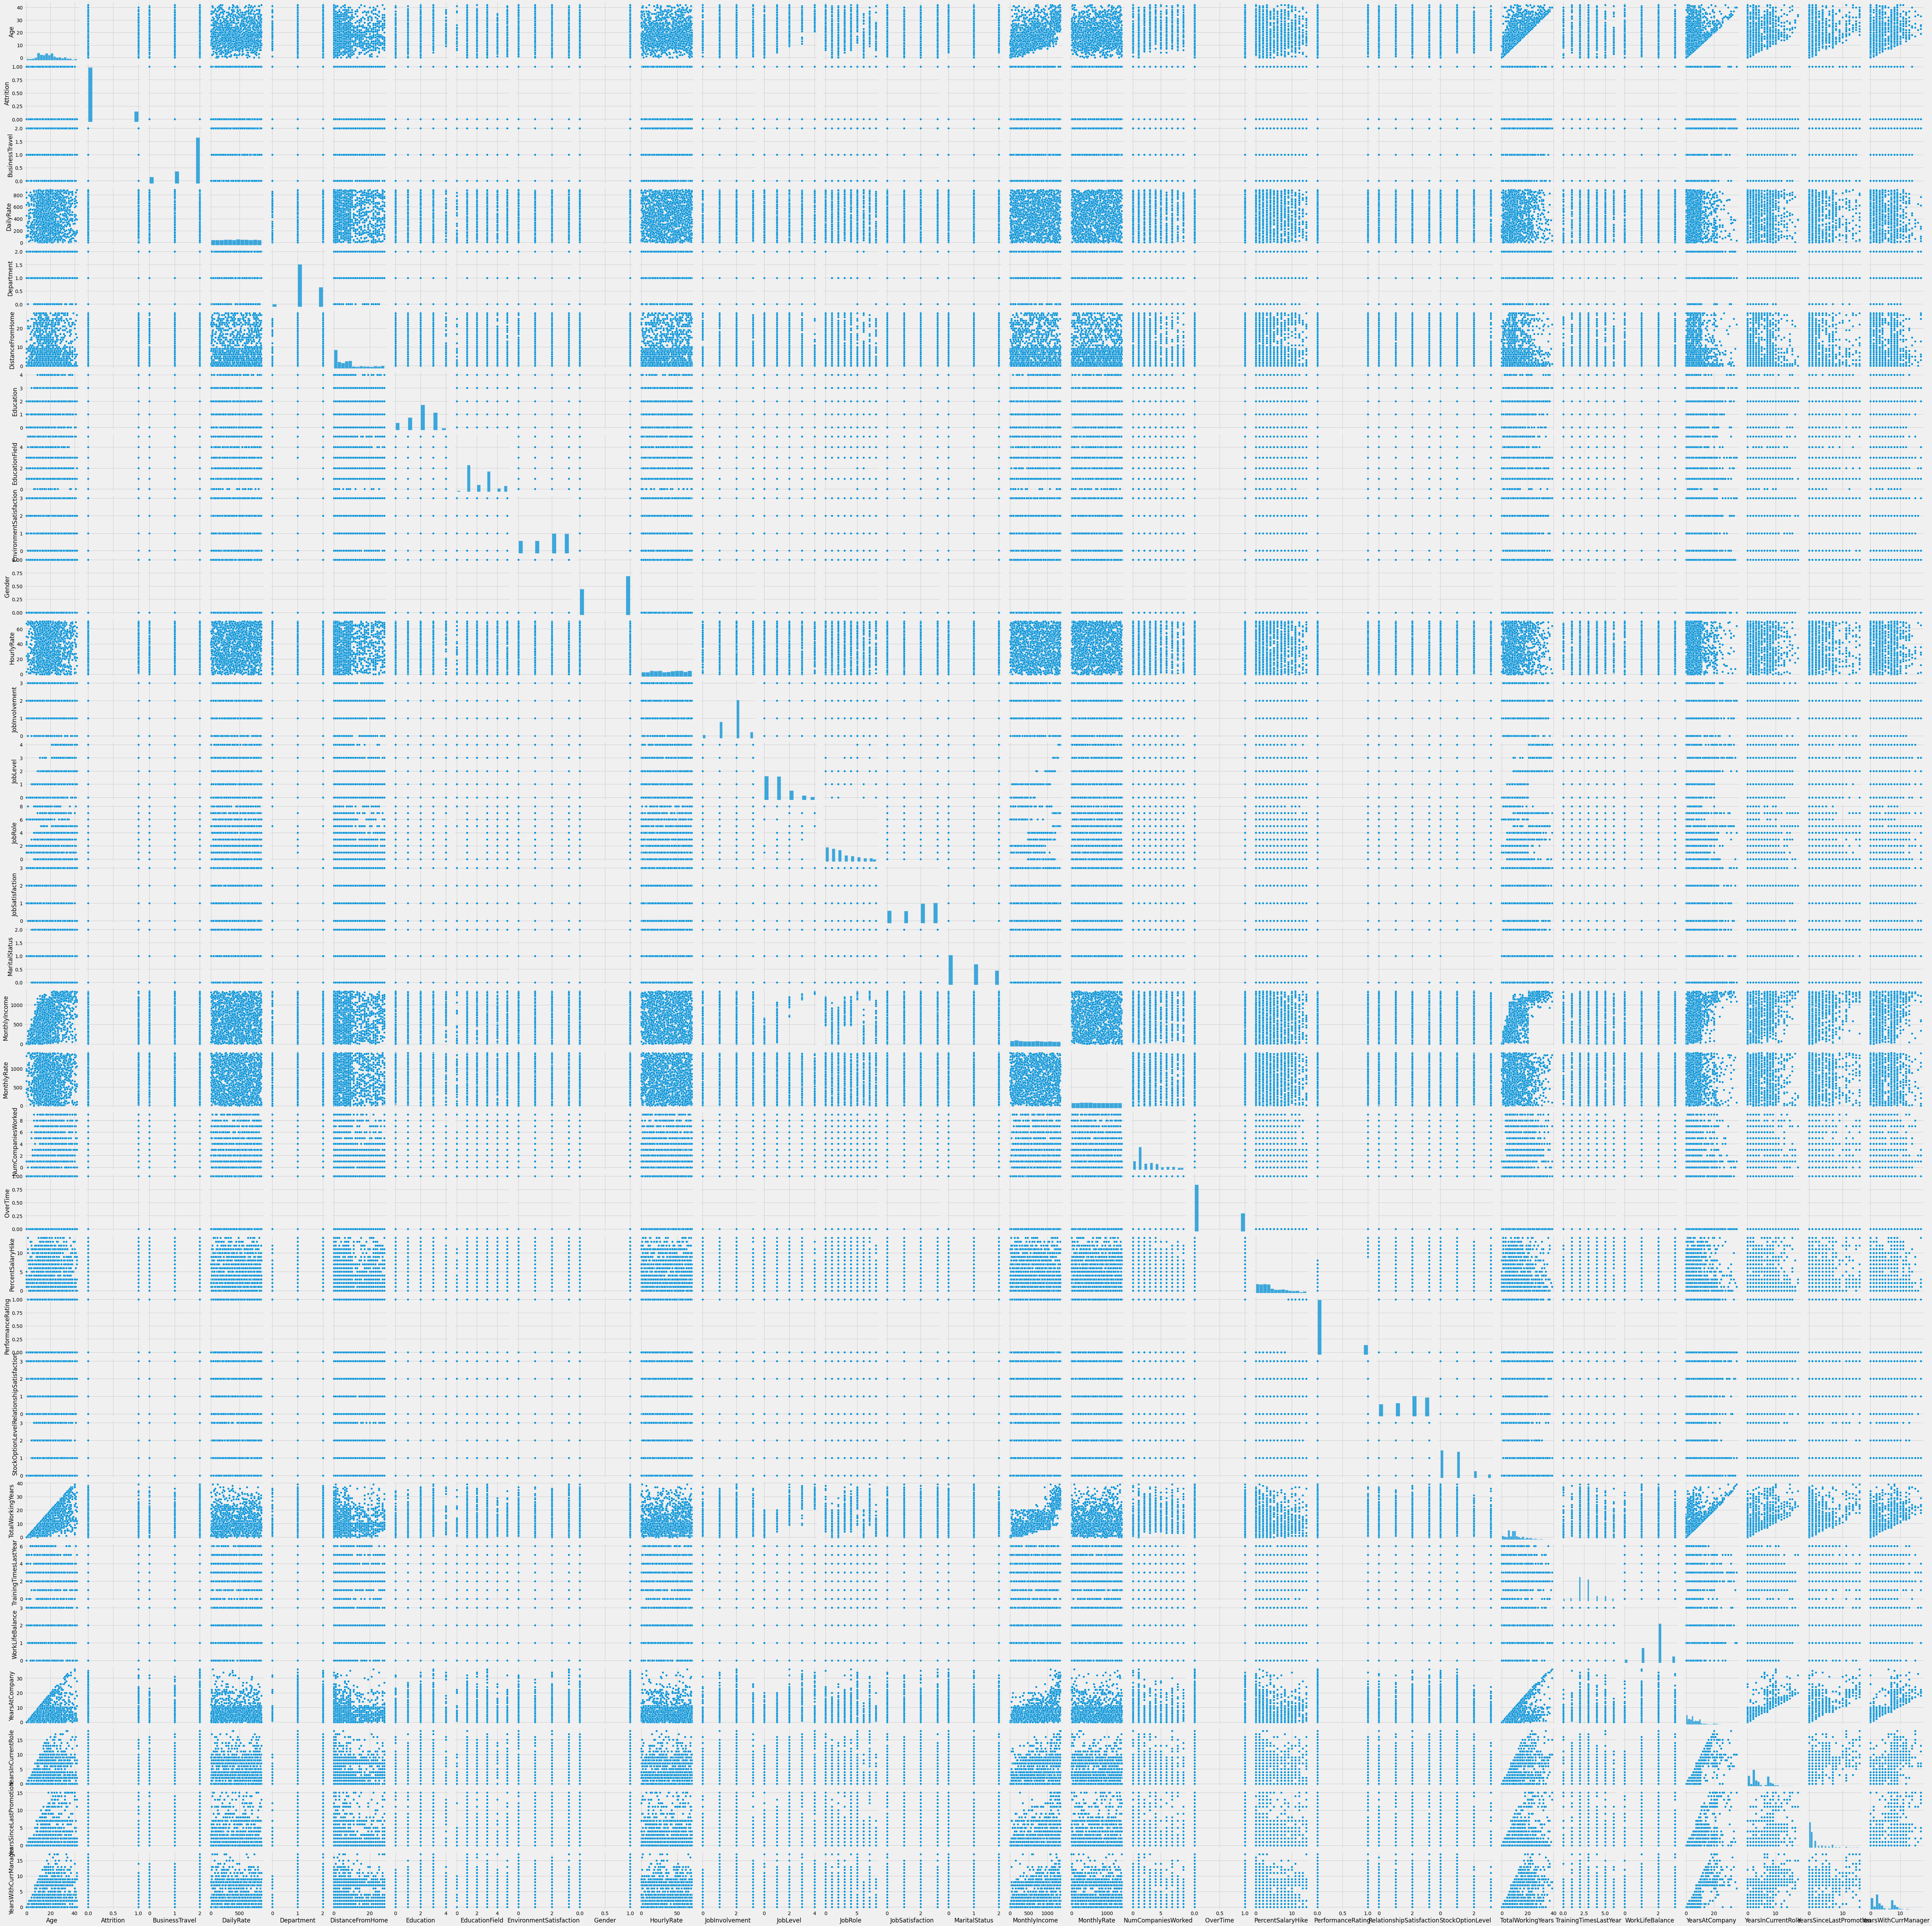

In [326]:
#pairplot
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='count'>

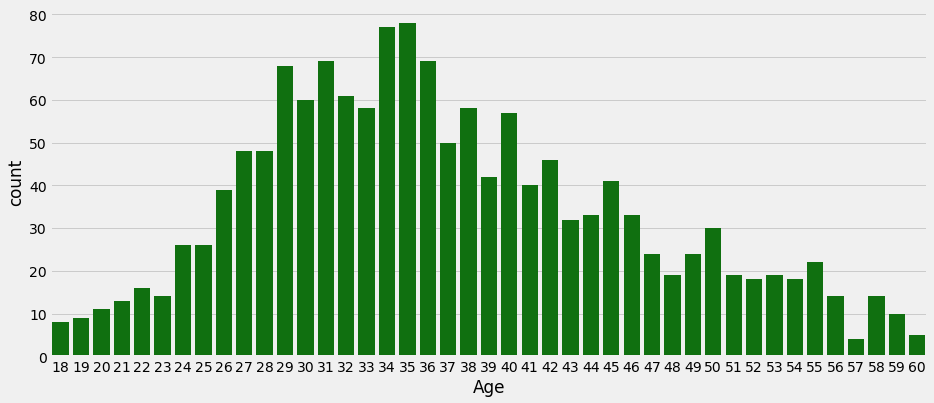

In [255]:
plt.figure(figsize=(14,6))
sns.countplot(data.Age,color='green')

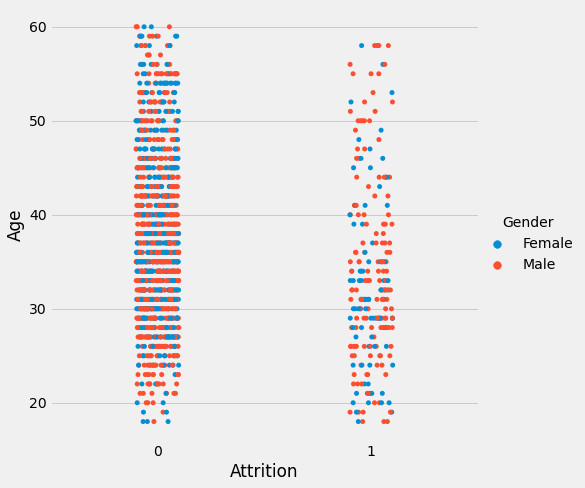

In [256]:
sns.catplot(x="Attrition", y='Age', data=data,hue='Gender',height=7)
plt.show()

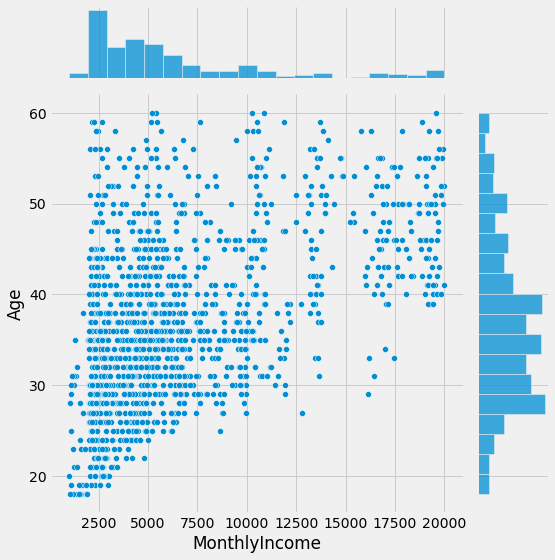

In [257]:
sns.jointplot(data.MonthlyIncome, data.Age, height=8, kind = "scatter")   
plt.show()

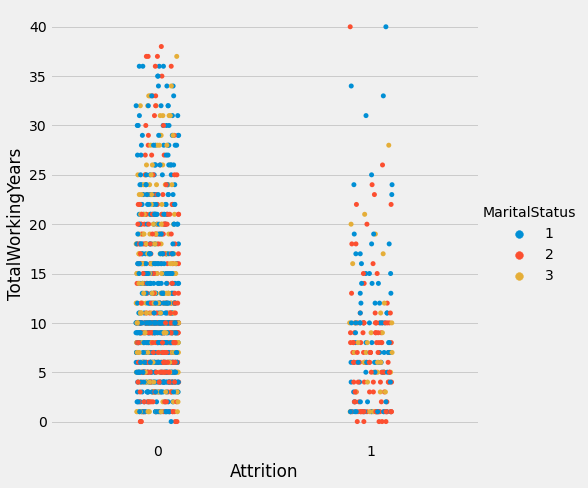

In [258]:
sns.catplot(x="Attrition", y='TotalWorkingYears', data=data,hue='MaritalStatus',height=7)
plt.show()

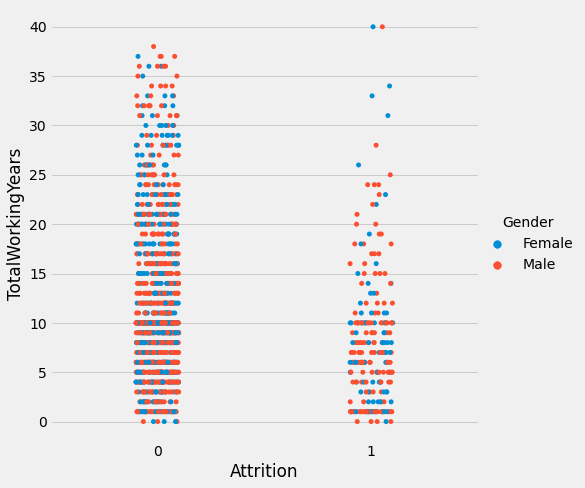

In [259]:
sns.catplot(x="Attrition", y='TotalWorkingYears', data=data,hue='Gender',height=7)
plt.show()

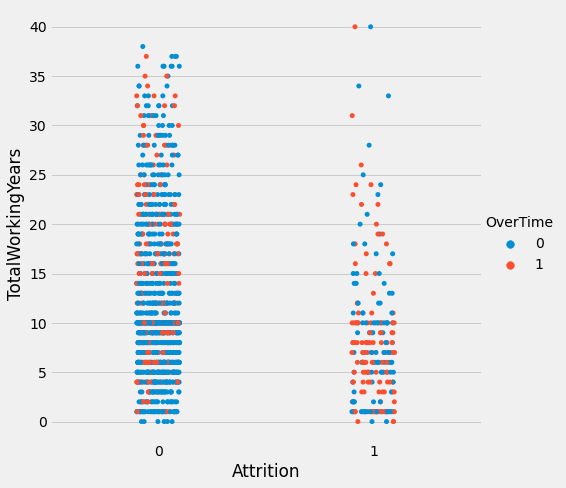

In [260]:
sns.catplot(x="Attrition", y='TotalWorkingYears', data=data,hue='OverTime',height=7)
plt.show()

In [261]:
df.Attrition[df.Attrition == 'Yes'] =1
df.Attrition[df.Attrition == 'No'] =0

In [262]:
df.OverTime[df.OverTime == 'Yes'] =1
df.OverTime[df.OverTime == 'No'] =0

In [263]:
df.Gender[df.Gender == 'male'] = 1
df.Gender[df.Gender == 'female'] = 0

In [267]:
df.JobRole[df.JobRole == 'Sales Executive'] = 1
df.JobRole[df.JobRole == 'Research Scientist'] = 2
df.JobRole[df.JobRole == 'Laboratory Technician'] = 3
df.JobRole[df.JobRole == 'Manufacturing Director'] = 4
df.JobRole[df.JobRole == 'Healthcare Representative'] = 5
df.JobRole[df.JobRole == 'Manager'] = 6
df.JobRole[df.JobRole == 'Sales Representative'] = 7
df.JobRole[df.JobRole == 'Research Director'] = 8
df.JobRole[df.JobRole == 'Human Resources'] = 9

In [268]:
df.MaritalStatus[df.MaritalStatus == 'Married']=1
df.MaritalStatus[df.MaritalStatus == 'Single']=2
df.MaritalStatus[df.MaritalStatus == 'Divorced']=3

In [269]:
df.shape

(1470, 35)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

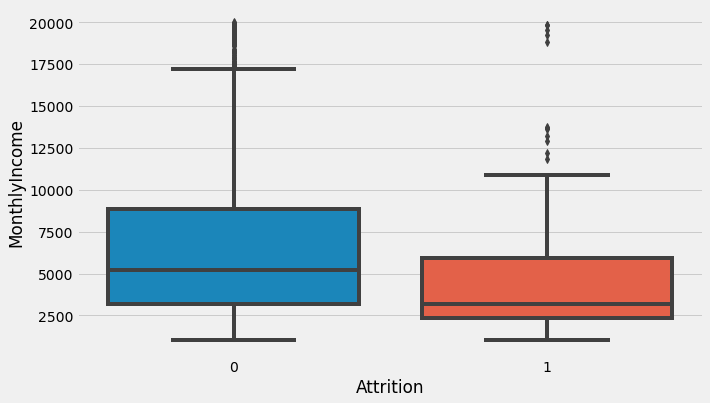

In [270]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = df)

#### ** Observations :: Looking at the dataset summary, we can see that 'sex' data is quite evenly distributed.

In [291]:
#Checking for missing/null values.


df.isnull().sum()  

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Need to Change the Data Type for futher processing.

In [292]:
df = df.astype('category')
df.dtypes

Age                         category
Attrition                   category
BusinessTravel              category
DailyRate                   category
Department                  category
DistanceFromHome            category
Education                   category
EducationField              category
EmployeeCount               category
EmployeeNumber              category
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                  category
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome               category
MonthlyRate                 category
NumCompaniesWorked          category
Over18                      category
OverTime                    category
PercentSalaryHike           category
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours               category
S

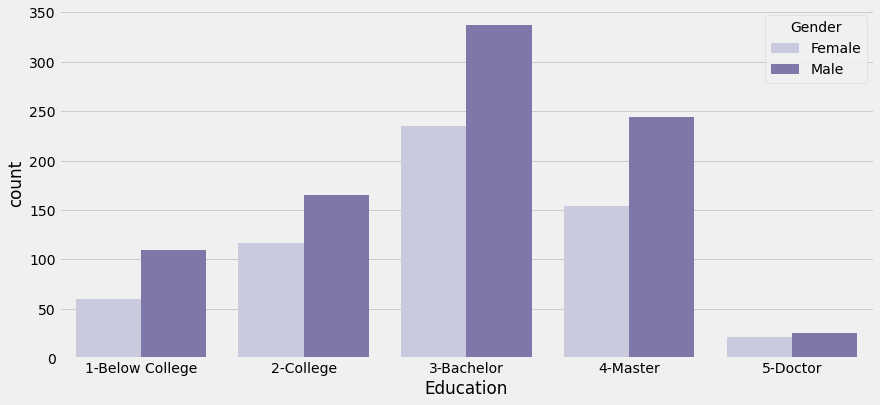

In [293]:
plt.figure(figsize=(13,6))
ax = sns.countplot(data=data,x='Education',hue='Gender',palette='Purples')
ax.set_xticklabels([ '1-Below College' , '2-College' , '3-Bachelor' ,'4-Master',  '5-Doctor'])
plt.show()

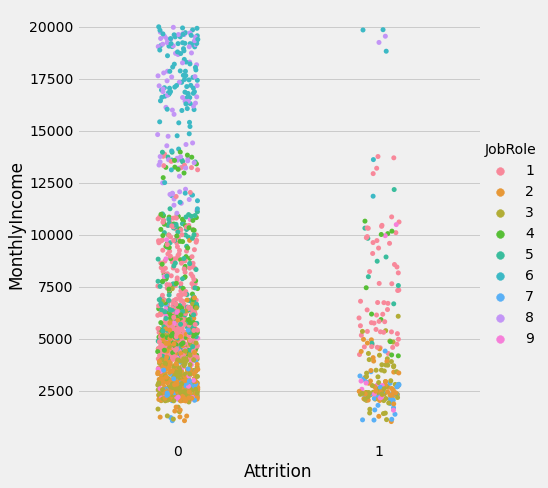

In [294]:
sns.catplot(x="Attrition", y="MonthlyIncome", data=data,hue='JobRole',height=7)
plt.show()

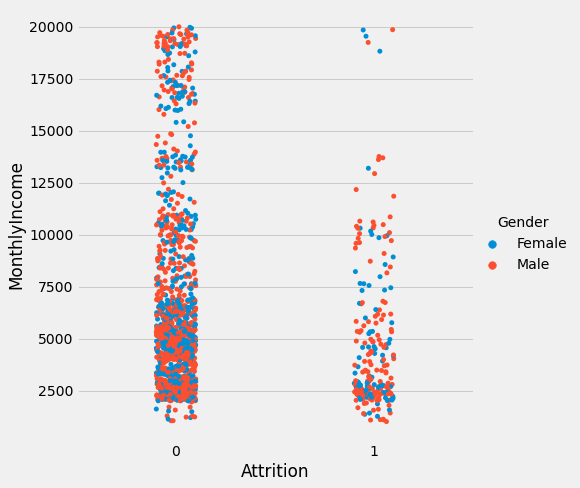

In [295]:
sns.catplot(x="Attrition", y="MonthlyIncome", data=data,hue='Gender',height=7)
plt.show()

Text(0.5, 1.0, 'PerfomanceRating vs PercentSalary Hike')

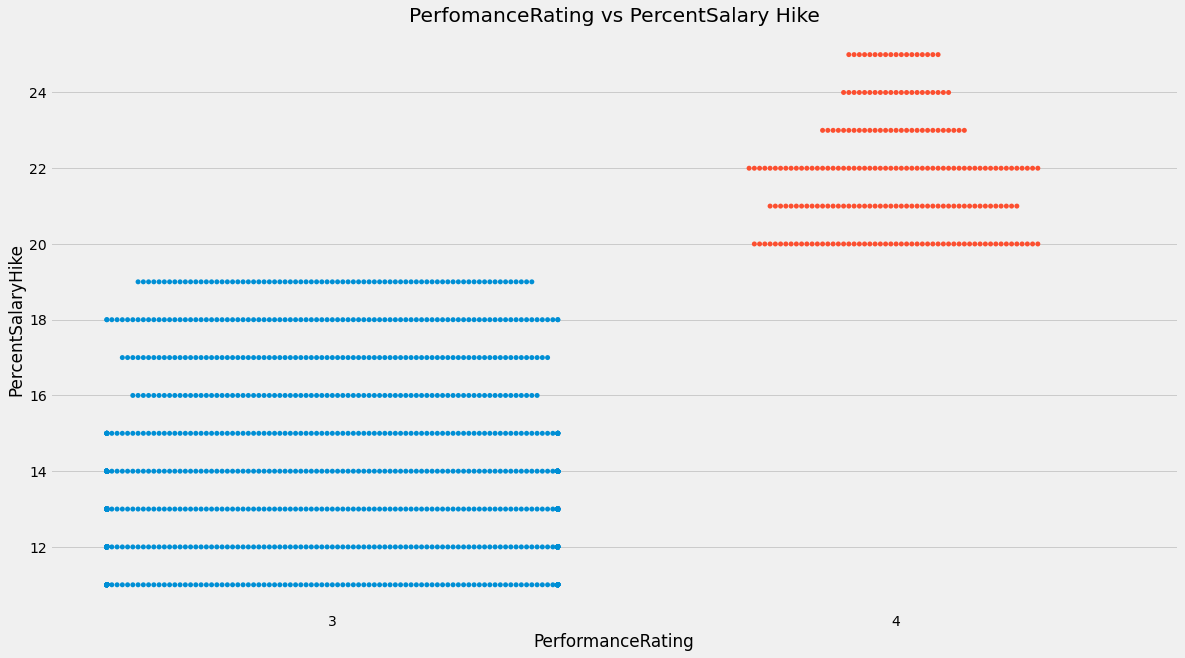

In [296]:
plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['PerformanceRating'], df['PercentSalaryHike'])
plt.title('PerfomanceRating vs PercentSalary Hike')

<AxesSubplot:>

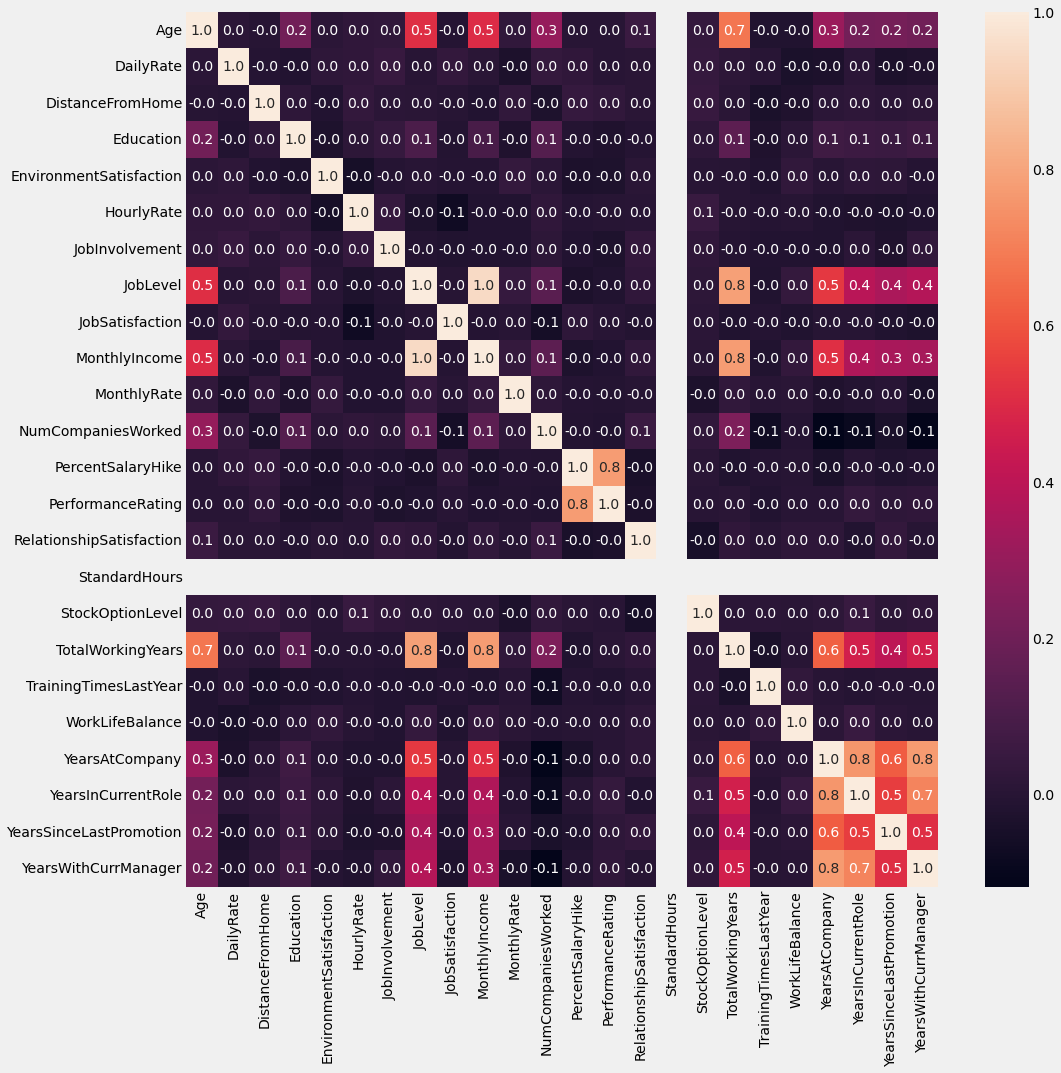

In [300]:
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

y= data[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.1f')

In [303]:
import nltk
import sklearn



from sklearn.preprocessing import LabelEncoder


labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [304]:
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   23          1               2        624           2                 0   
1   31          0               1        113           1                 7   
2   19          1               2        805           1                 1   
3   15          0               1        820           1                 2   
4    9          0               2        312           1                 1   

   Education  EducationField  EmployeeCount  EmployeeNumber  \
0          1               1              0               0   
1          0               1              0               1   
2          1               4              0               2   
3          3               1              0               3   
4          0               3              0               4   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        1       0          64               2         1   
1                        2       1          31               1         1   
2                        3       1          62               1         0   
3                        3       0          26               2         0   
4                        0       1          10               2         0   

   JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  \
0        0                3              1            809          999   
1        1                1              0            682         1328   
2        2                2              1             62           18   
3        1                2              0            313         1228   
4        2                1              0            399          846   

   NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8       0         1                  0                  0   
1                   1       0         0                 12                  1   
2                   6       0         1                  4                  0   
3                   1       0         1                  0                  0   
4                   9       0         0                  1                  0   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         0              0                 0   
1                         3              0                 1   
2                         1              0                 0   
3                         2              0                 0   
4                         3              0                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                0               6   
1                 10                      3                2              10   
2                  7                      3                2               0   
3                  8                      3                2               8   
4                  6                      3                2               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

In [305]:
df.shape

(1470, 35)

In [308]:
df.describe()

Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     18.923810     0.161224        1.607483   443.074830     1.260544   
std       9.135373     0.367863        0.665455   253.513199     0.527792   
min       0.000000     0.000000        0.000000     0.000000     0.000000   
25%      12.000000     0.000000        1.000000   225.000000     1.000000   
50%      18.000000     0.000000        2.000000   447.000000     1.000000   
75%      25.000000     0.000000        2.000000   660.000000     2.000000   
max      42.000000     1.000000        2.000000   885.000000     2.000000   

       DistanceFromHome    Education  EducationField  EmployeeCount  \
count       1470.000000  1470.000000     1470.000000         1470.0   
mean           8.192517     1.912925        2.247619            0.0   
std            8.106864     1.024165        1.331369            0.0   
min            0.000000     0.000000        0.000000            0.0   
25%            1.000000     1.000000        1.000000            0.0   
50%            6.000000     2.000000        2.000000            0.0   
75%           13.000000     3.000000        3.000000            0.0   
max           28.000000     4.000000        5.000000            0.0   

       EmployeeNumber  EnvironmentSatisfaction       Gender   HourlyRate  \
count     1470.000000              1470.000000  1470.000000  1470.000000   
mean       734.500000                 1.721769     0.600000    35.891156   
std        424.496761                 1.093082     0.490065    20.329428   
min          0.000000                 0.000000     0.000000     0.000000   
25%        367.250000                 1.000000     0.000000    18.000000   
50%        734.500000                 2.000000     1.000000    36.000000   
75%       1101.750000                 3.000000     1.000000    53.750000   
max       1469.000000                 3.000000     1.000000    70.000000   

       JobInvolvement     JobLevel      JobRole  JobSatisfaction  \
count     1470.000000  1470.000000  1470.000000      1470.000000   
mean         1.729932     1.063946     2.553061         1.728571   
std          0.711561     1.106940     2.323902         1.102846   
min          0.000000     0.000000     0.000000         0.000000   
25%          1.000000     0.000000     1.000000         1.000000   
50%          2.000000     1.000000     2.000000         2.000000   
75%          2.000000     2.000000     4.000000         3.000000   
max          3.000000     4.000000     8.000000         3.000000   

       MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  \
count    1470.000000    1470.000000  1470.000000         1470.000000  1470.0   
mean        0.764626     655.029252   709.248980            2.693197     0.0   
std         0.790757     388.751420   411.827139            2.498009     0.0   
min         0.000000       0.000000     0.000000            0.000000     0.0   
25%         0.000000     314.000000   353.250000            1.000000     0.0   
50%         1.000000     651.500000   706.500000            2.000000     0.0   
75%         1.000000     986.750000  1065.750000            4.000000     0.0   
max         2.000000    1348.000000  1426.000000            9.000000     0.0   

          OverTime  PercentSalaryHike  PerformanceRating  \
count  1470.000000        1470.000000        1470.000000   
mean      0.282993           4.209524           0.153741   
std       0.450606           3.659938           0.360824   
min       0.000000           0.000000           0.000000   
25%       0.000000           1.000000           0.000000   
50%       0.000000           3.000000           0.000000   
75%       1.000000           7.000000           0.000000   
max       1.000000          14.000000           1.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

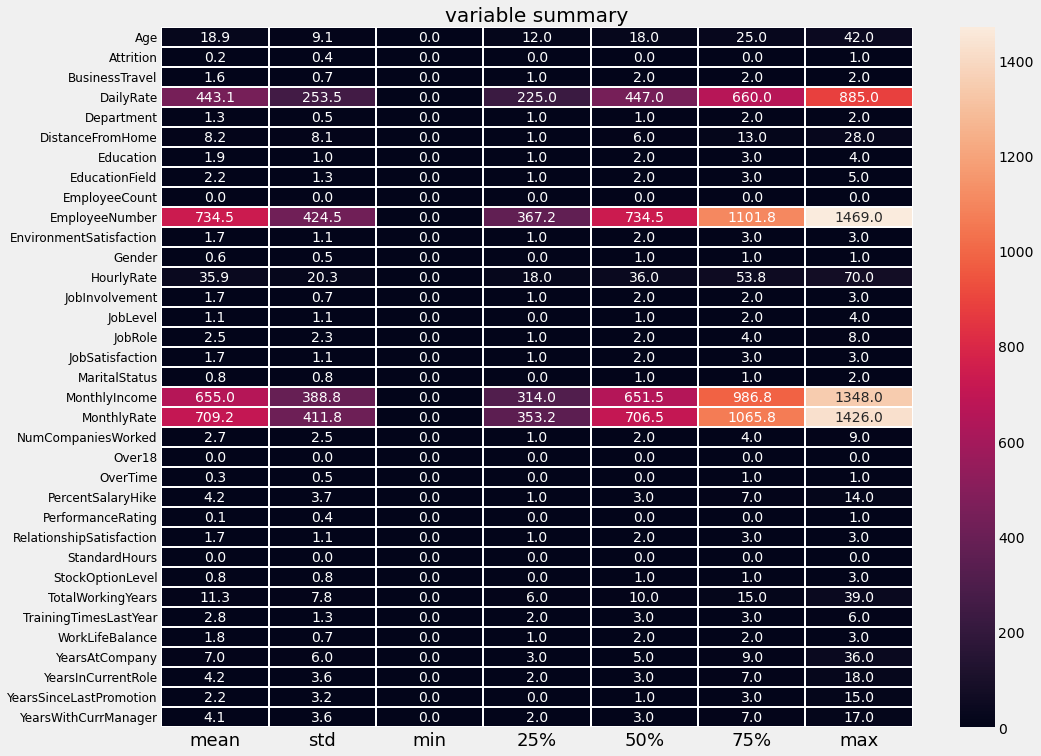

In [313]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.1f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()

<AxesSubplot:>

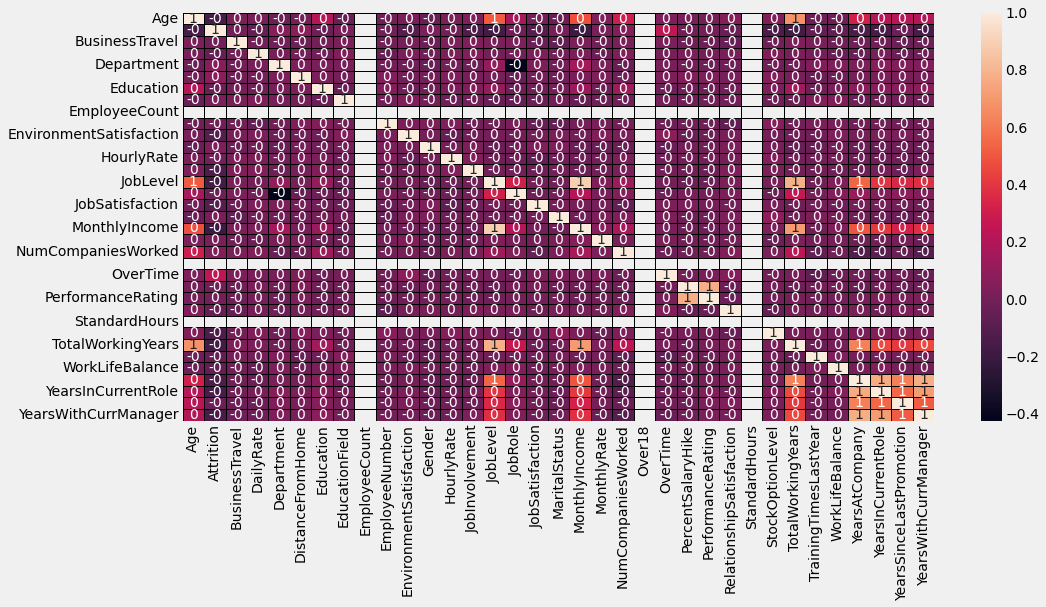

In [312]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt= '.0f')

### Observations for the above : the column “veil-type” is 0 and not contributing to the data so we’ll remove it.

In [314]:
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)
df.drop('EmployeeNumber', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
print(df.shape)

(1470, 31)


In [315]:
df.isnull().sum()  

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<AxesSubplot:>

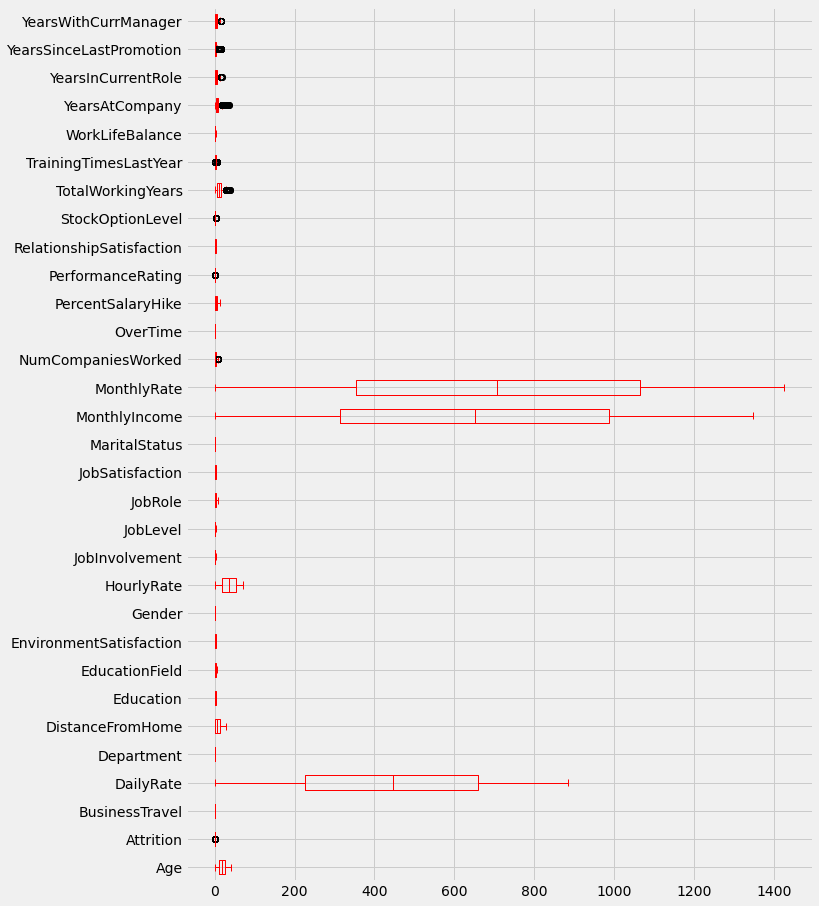

In [320]:
df.plot(kind='box',color='r',vert = False,figsize =(10,15))    #Box Plot

Usually, the least correlating variable is the most important one for classification. In this case, “gill-color” is -0.53 so let’s look at it closely:

In [321]:
#Getting summary metrics for the dataframe
print(df.describe())

               Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     18.923810     0.161224        1.607483   443.074830     1.260544   
std       9.135373     0.367863        0.665455   253.513199     0.527792   
min       0.000000     0.000000        0.000000     0.000000     0.000000   
25%      12.000000     0.000000        1.000000   225.000000     1.000000   
50%      18.000000     0.000000        2.000000   447.000000     1.000000   
75%      25.000000     0.000000        2.000000   660.000000     2.000000   
max      42.000000     1.000000        2.000000   885.000000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       1470.000000  1470.000000     1470.000000              1470.000000   
mean           8.192517     1.912925        2.247619                 1.721769   
std            8.106864     1.024165        1.331369           

In [322]:
#Checking for missing/null values
df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<AxesSubplot:>

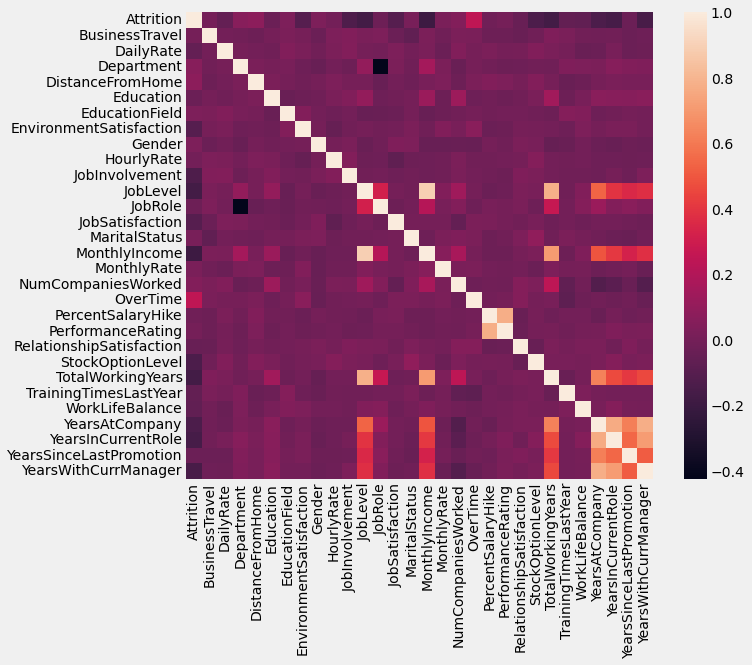

In [325]:
#plotting corelation Matrix
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=1, square=True)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='

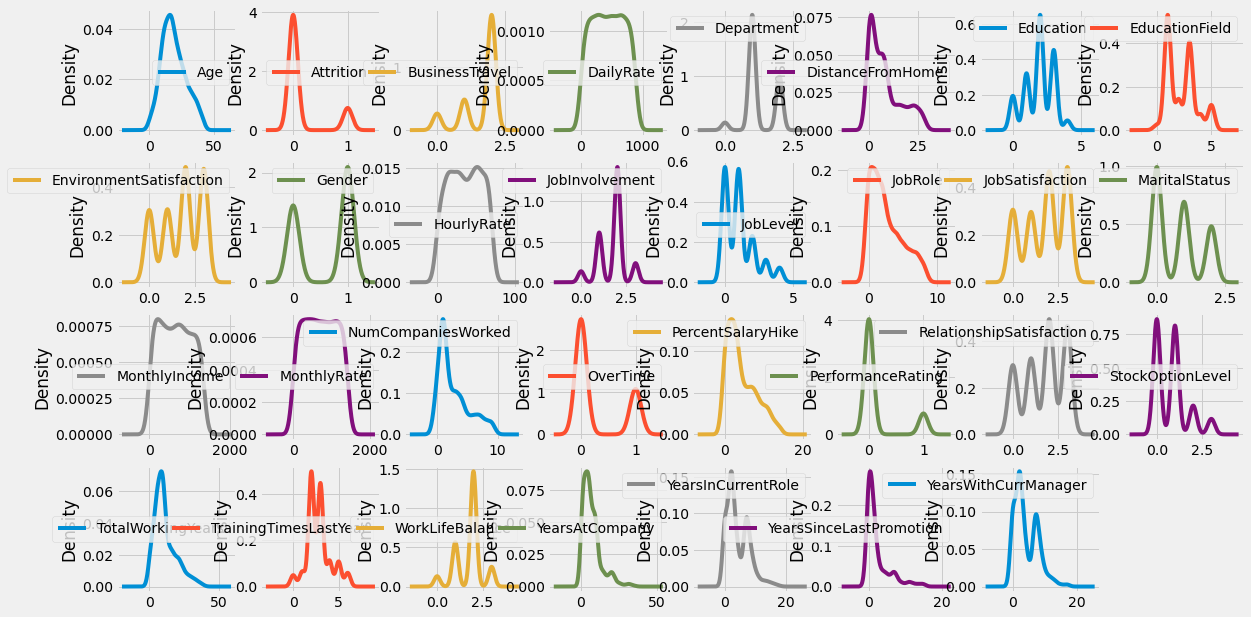

In [354]:
df.plot(kind ='density',subplots = True, layout =(4,8),sharex = False)

In [329]:
df.shape

(1470, 31)

In [330]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(1470, 31)

In [331]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430]), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 27, 30, 29, 28, 28,

In [332]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1470, 31)
(1387, 31)


In [333]:
loss_percent=(1470-1387)/1470*100
print(loss_percent)

5.646258503401361


In [334]:
X = df.drop(['Attrition'], axis = 1)
Y = df['Attrition']

In [335]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [336]:
X

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      23               2        624           2                 0          1   
1      31               1        113           1                 7          0   
2      19               2        805           1                 1          1   
3      15               1        820           1                 2          3   
4       9               2        312           1                 1          0   
...   ...             ...        ...         ...               ...        ...   
1465   18               1        494           1                22          1   
1466   21               2        327           1                 5          0   
1467    9               2         39           1                 3          2   
1468   31               1        579           2                 1          2   
1469   16               2        336           1                 7          2   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        1       0          64   
1                  1                        2       1          31   
2                  4                        3       1          62   
3                  1                        3       0          26   
4                  3                        0       1          10   
...              ...                      ...     ...         ...   
1465               3                        2       1          11   
1466               3                        3       1          12   
1467               1                        1       1          57   
1468               3                        3       1          33   
1469               3                        1       1          52   

      JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0                  2         1        0                3              1   
1                  1         1        1                1              0   
2                  1         0        2                2              1   
3                  2         0        1                2              0   
4                  2         0        2                1              0   
...              ...       ...      ...              ...            ...   
1465               3         1        2                3              0   
1466               1         2        4                0              0   
1467               3         1        3                1              0   
1468               1         1        0                1              0   
1469               3         1        2                2              0   

      MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0               809          999                   8         1   
1               682         1328                   1         0   
2                62           18                   6         1   
3               313         1228                   1         1   
4               399          846                   9         0   
...             ...          ...                 ...       ...   
1465            210          599                   4         0   
1466           1070         1123                   4         0   
1467            821          175                   1         1   
1468            730          641                   2         0   
1469            554          483                   2         0   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                     0                  0                         0   
1                    12                  1                         3   
2                     4                  0                         1   
3                     0                  0                         2   
4                     1                  0                         3   
...                 ...                ...                       ...   
1465  

# Skewness Checking of the Data

In [337]:
X.skew(axis = 0, skipna = True)

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                     0.770149
JobSatisfaction            -0.329672
MaritalStatus               0.443615
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.676650
Y

In [338]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [339]:
X

array([[ 0.50993885,  0.63546836,  0.73469647, ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.2681303 , -1.39286498, -1.33832411, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.09650893,  0.63546836,  1.32387414, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.10215697,  0.63546836, -1.79579143, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.2681303 , -1.39286498,  0.58109251, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.2336871 ,  0.63546836, -0.31843583, ..., -0.08961473,
         0.09685415, -0.40688122]])

In [340]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64


# Feature Importance

In [341]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.04630186 0.02360827 0.0321967  0.021297   0.0339163  0.02930944
 0.0285698  0.03728632 0.02241484 0.03153166 0.03236201 0.03570464
 0.03634639 0.03649328 0.02684901 0.04431383 0.03022637 0.03170629
 0.07148441 0.03085824 0.01200225 0.03219111 0.03826692 0.04205295
 0.0297922  0.03287073 0.0342366  0.0329145  0.02692299 0.03597311]


In [342]:
#Splitting Dataset

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [345]:
#Using Logistics Regression

In [346]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred_log = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_log))

Accuracy Score: 0.8571428571428571


In [347]:
confusion_mat_log = confusion_matrix(Y_test,Y_pred_log)
print(confusion_mat_log)

[[355  16]
 [ 47  23]]


In [348]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_log,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       371
           1       0.59      0.33      0.42        70

    accuracy                           0.86       441
   macro avg       0.74      0.64      0.67       441
weighted avg       0.84      0.86      0.84       441



In [349]:
fpr5,tpr5,thresholds = roc_curve(Y_test,Y_pred_log)

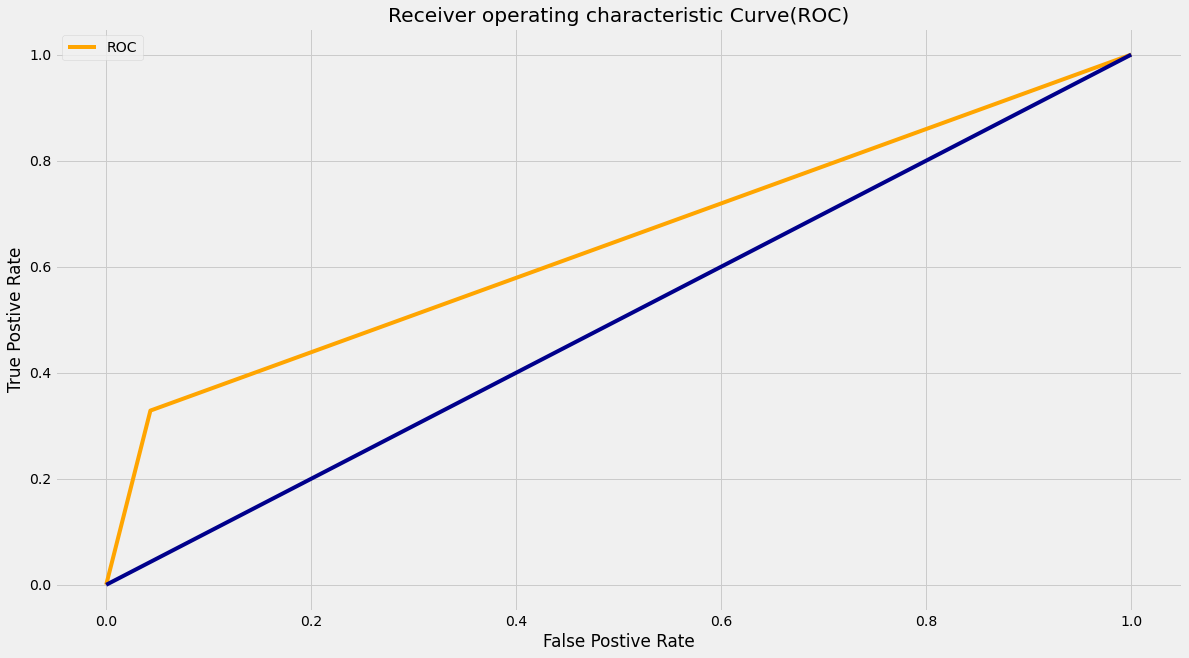

In [350]:
plt.plot(fpr5,tpr5,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

# Using KNN:

In [356]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_pred_knn = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_knn))

Accuracy Score: 0.8526077097505669


In [357]:
confusion_mat_knn = confusion_matrix(Y_test,Y_pred_knn)
print(confusion_mat_knn)

[[362   9]
 [ 56  14]]


In [358]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_knn,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.61      0.20      0.30        70

    accuracy                           0.85       441
   macro avg       0.74      0.59      0.61       441
weighted avg       0.83      0.85      0.82       441



In [359]:
fpr,tpr,thresholds = roc_curve(Y_test,Y_pred_knn)

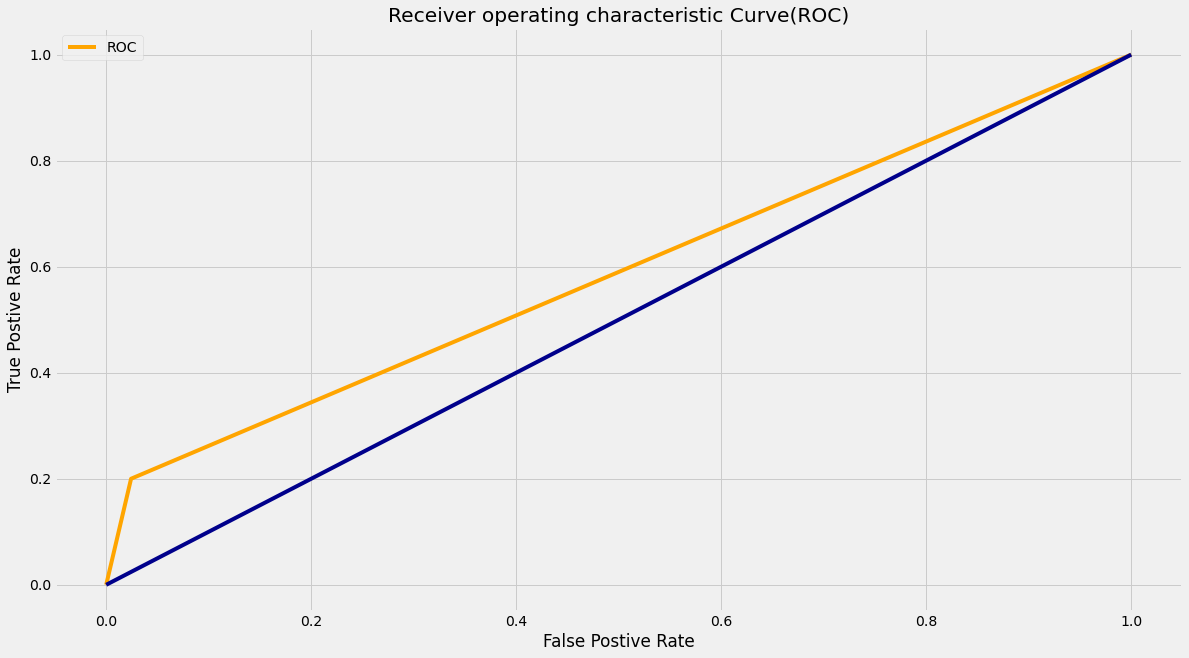

In [360]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

# Using Decision Tree:

In [361]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
Y_pred_dt = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_dt))

Accuracy Score: 0.7687074829931972


In [362]:
confusion_mat_dt= confusion_matrix(Y_test,Y_pred_dt)
print(confusion_mat_dt)

[[312  59]
 [ 43  27]]


In [363]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_dt,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       371
           1       0.31      0.39      0.35        70

    accuracy                           0.77       441
   macro avg       0.60      0.61      0.60       441
weighted avg       0.79      0.77      0.78       441



In [364]:
fpr2,tpr2,thresholds = roc_curve(Y_test,Y_pred_dt)

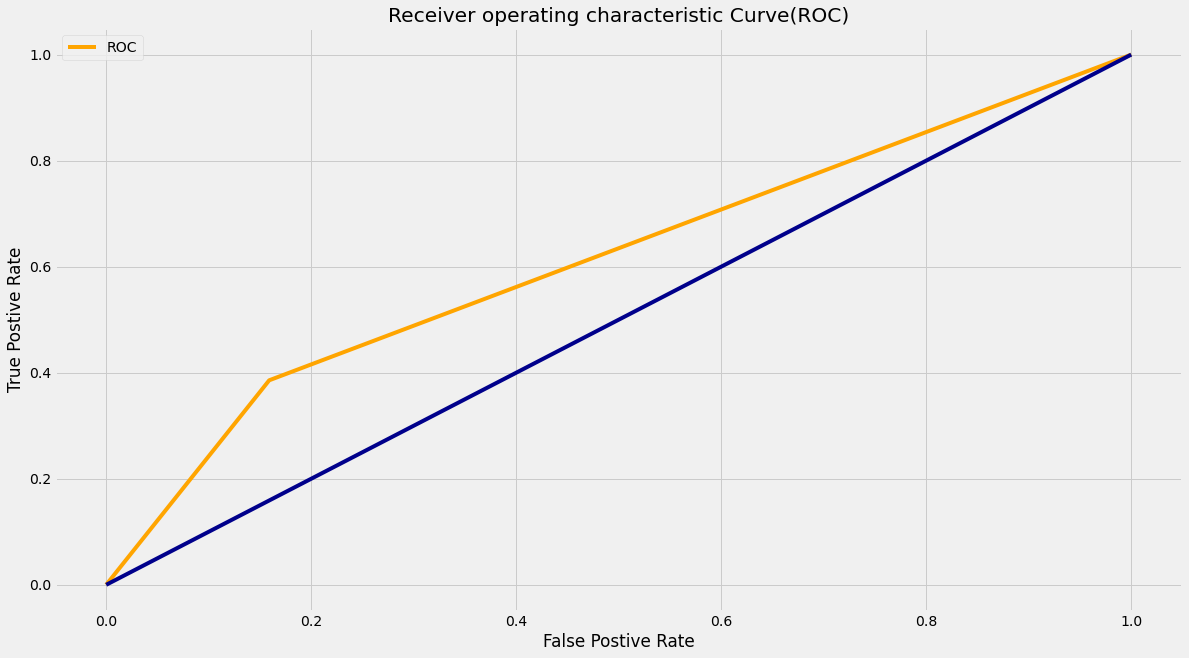

In [365]:
plt.plot(fpr2,tpr2,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

# Using Random Forest:

In [366]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
Y_pred_rf = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_rf))

Accuracy Score: 0.8526077097505669


In [367]:
confusion_mat_rf= confusion_matrix(Y_test,Y_pred_rf)
print(confusion_mat_rf)

[[365   6]
 [ 59  11]]


In [368]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred_rf,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       371
           1       0.65      0.16      0.25        70

    accuracy                           0.85       441
   macro avg       0.75      0.57      0.59       441
weighted avg       0.83      0.85      0.81       441



In [369]:
fpr4,tpr4,thresholds = roc_curve(Y_test,Y_pred_rf)

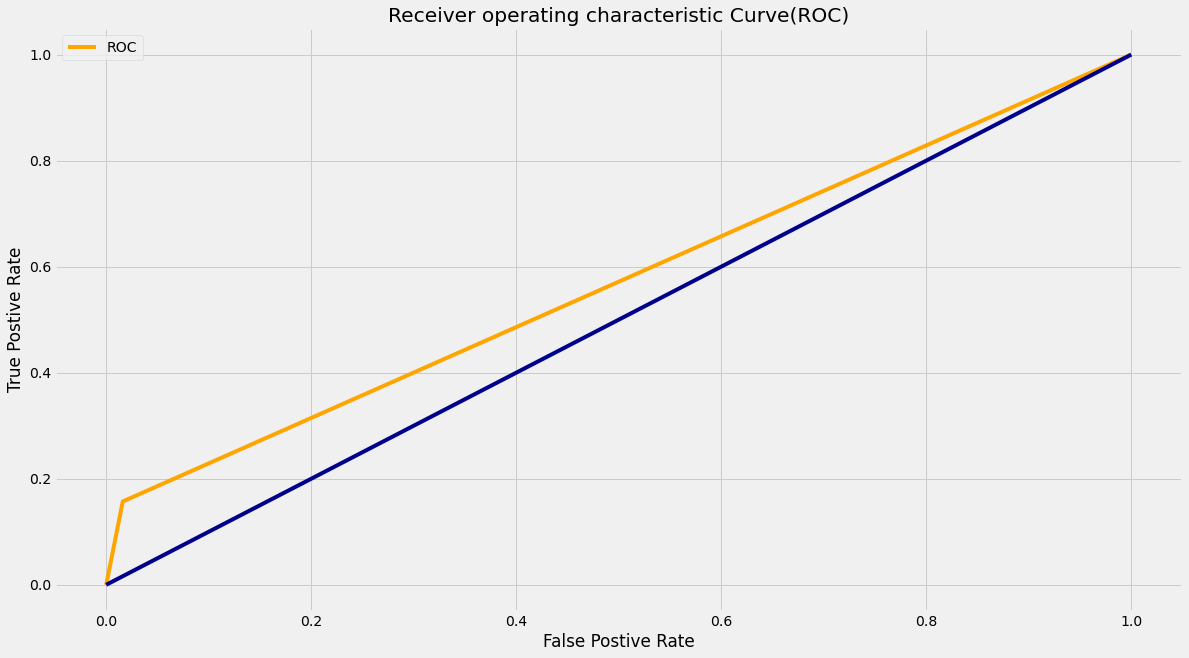

In [370]:
plt.plot(fpr4,tpr4,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic Curve(ROC)')
plt.legend()
plt.show()

In [371]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')


rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_test, Y_test)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 11, 'max_features': 9}
0.8571212121212122


In [379]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1,max_depth=11,max_features=9)
model2.fit(X_train, Y_train)
Y_pred_rf1 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_rf))

Accuracy Score: 0.8526077097505669


# So Random Forest is the Best

# Cross Validation Score

Ideal: 0.840
> folds=2, accuracy=0.740 (0.700,0.780)
> folds=3, accuracy=0.749 (0.697,0.824)
> folds=4, accuracy=0.790 (0.640,0.920)
> folds=5, accuracy=0.810 (0.600,0.950)
> folds=6, accuracy=0.820 (0.688,0.941)
> folds=7, accuracy=0.799 (0.571,1.000)
> folds=8, accuracy=0.811 (0.385,0.923)
> folds=9, accuracy=0.829 (0.636,1.000)
> folds=10, accuracy=0.850 (0.600,1.000)
> folds=11, accuracy=0.829 (0.667,1.000)
> folds=12, accuracy=0.785 (0.250,1.000)
> folds=13, accuracy=0.839 (0.571,1.000)
> folds=14, accuracy=0.807 (0.429,1.000)
> folds=15, accuracy=0.821 (0.571,1.000)
> folds=16, accuracy=0.827 (0.500,1.000)
> folds=17, accuracy=0.816 (0.600,1.000)
> folds=18, accuracy=0.831 (0.600,1.000)
> folds=19, accuracy=0.826 (0.600,1.000)
> folds=20, accuracy=0.830 (0.600,1.000)
> folds=21, accuracy=0.814 (0.500,1.000)
> folds=22, accuracy=0.820 (0.500,1.000)
> folds=23, accuracy=0.802 (0.250,1.000)
> folds=24, accuracy=0.804 (0.250,1.000)
> folds=25, accuracy=0.810 (0.250,1.000)
> folds=26,

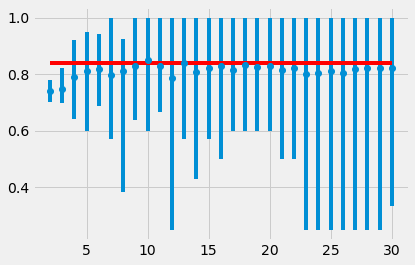

In [389]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# create the dataset
def get_dataset(n_samples=100):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
 
# retrieve the model to be evaluate
def get_model():
	model = LogisticRegression()
	return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the dataset
	X, y = get_dataset()
	# get the model
	model = get_model()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

In [394]:
import pickle
filename= 'HR_Analytics.pkl'
pickle.dump(model,open (filename,'wb'))

# The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# ##Few Key Points

1. Most of People are Not Leaving the company only 15% of the people are leaving the organization

2. Majority People are from R&D & Sales so the Attrition Rate is much higher

3. Most of the Junior level & Midlevel employees are leaving the organization, so need to focus on that age Group.

4. Travel also a key contributer for Attrition Rate

5. People who are doing well but lower rating leaving the most

6. Much Experienced people are Not Leaving much as their Job & Personal Life seems balanced.

7. Attrition Rate is not dependent much in terms of Gender or Distance From Home.

8. Salary increament & Proper Training will motivate the employees

9. People who are doing Overtime are leaving more

10. Need to discuss regularly with the Employees from Management